## Köşe Tespit Algoritması

- Harris Köşe Tespiti
- Shi-Tomasi Köşe Tespiti

In [1]:
import cv2
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

## Harris Köşe Tespiti

1988'de Chris Harris ve Mike Stephens tarafından yayınlandı
her yönde önemli değişiklikler arayarak

Düz bölgelerde her yönde değişiklik olmayacak
Edge'de büyük değişiklikler olmayacak






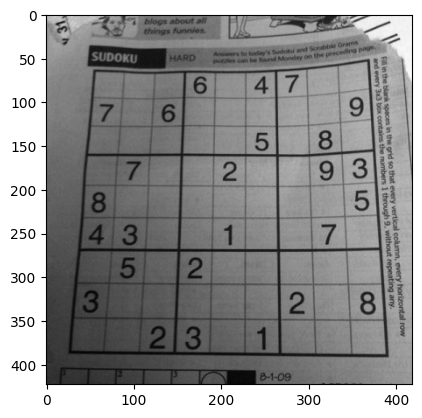

In [2]:
sudoku_bgr = cv2.imread('/content/sudoku-original.jpg')
sudoku = cv2.cvtColor(sudoku_bgr, cv2.COLOR_BGR2GRAY)
plt.imshow(sudoku, cmap='gray')

**köşeHarris Fonksiyonu**

*  src Giriş tek kanallı 8 bit veya kayan noktalı görüntü.
*  Harris dedektör yanıtlarını depolamak için dst görüntüsü. CV_32FC1 tipinde ve src ile aynı boyuttadır.
*  BlockSize Mahalle boyutu (ayrıntılara bakın #cornerEigenValsAndVecs ).
*  ksize Sobel operatörü için Açıklık parametresi.
*  k Harris dedektörünün serbest parametresi. DocString'deki formül.
*  borderType Piksel ekstrapolasyon yöntemi. Bkz. #KenarTürleri.

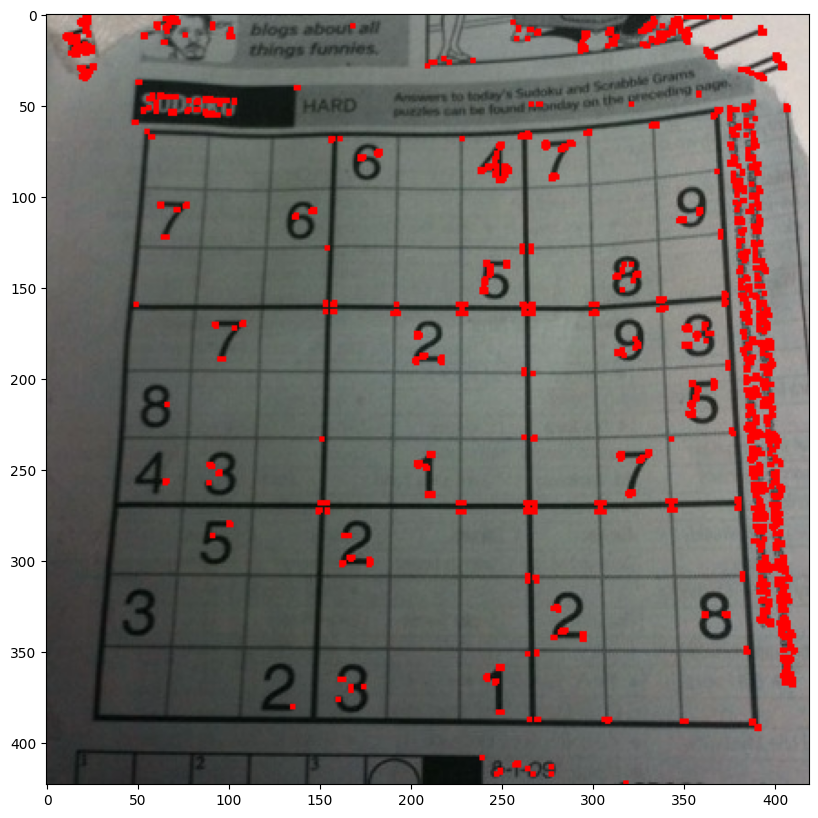

In [3]:
# Gri Tonlamalı Görüntüyü Değişken Değerlere Dönüştür
gray = np.float32(sudoku)

# Köşe Harris Tespiti
dst = cv2.cornerHarris(src=gray,blockSize=2,ksize=3,k=0.04)

# sonuç köşeleri işaretlemek için genişletilir, gerçek köşe tespiti için önemli değildir
# bu sadece gösterilen resimdeki noktaları işaretleyebilmemiz için
dst = cv2.dilate(dst,None)

# Optimum değer için eşik, görüntüye bağlı olarak değişebilir.
sudoku_bgr[dst>0.01*dst.max()]=[255,0,0]

fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111)
ax.imshow(sudoku_bgr)


## Shi-Tomasi Köşe Tespiti
-----

## Shi-Tomasi Köşe Dedektörü ve Kağıt Takibi İçin İyi Özellikler

[Videodan Makaleye Bağlantı](http://www.ai.mit.edu/courses/6.891/handouts/shi94good.pdf)

goodFeatureToTrack İşlev Parametreleri

* görüntü Girişi 8 bit veya kayan noktalı 32 bit, tek kanallı görüntü.
* köşeler Algılanan köşelerin çıktı vektörü.
* maxCorners Döndürülecek maksimum köşe sayısı.Bulunan köşelerden daha fazlası varsa, bunlardan en güçlü olanı döndürülür. `maxCorners <= 0`, maksimumda herhangi bir sınır ayarlanmadığını ve algılanan tüm köşelerin döndürüldüğünü belirtir.
* QualityLevel Görüntü köşelerinin kabul edilen minimum kalitesini karakterize eden parametre. Parametre değeri, minimum özdeğer (bkz. #cornerMinEigenVal) veya Harris işlevi yanıtı (bkz. #cornerHarris) olan en iyi köşe kalitesi ölçüsüyle çarpılır. Kalite ölçüsü üründen daha düşük olan köşeler reddedilir. Örneğin, en iyi köşenin kalite ölçüsü = 1500 ve kaliteSeviyesi=0,01 ise, kalite ölçüsü 15'ten küçük olan tüm köşeler reddedilir.

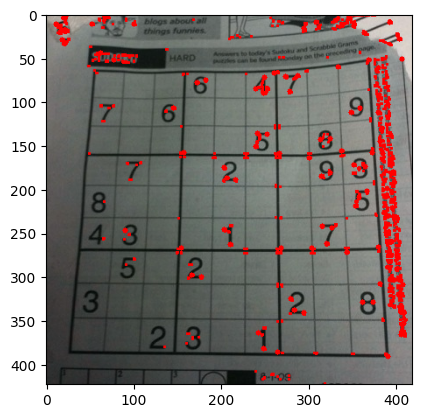

In [4]:
corners = cv2.goodFeaturesToTrack(sudoku,100,0.01,10)
corners = np.int0(corners)

for i in corners:
    x,y = i.ravel()
    cv2.circle(sudoku_bgr,(x,y),3,255,-1)

plt.imshow(sudoku_bgr)